In [18]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist # 28x28 of hand-written digits from 0-9

# Load data and split into train,test data
(trainX, trainY), (testX, testY) = mnist.load_data()

BS =32 # Batch size
EPOCHS=3
# Normalize datas / scaling data
# the data value will have range from 0-1

trainX = tf.keras.utils.normalize(trainX, axis=1)
testX = tf.keras.utils.normalize(testX, axis=1)

# Create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # 128 units (nerons in layer)
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # 128 units (nerons in layer)
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # 128 units (nerons in layer), softmax for probability distribution


model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#model.fit(trainX, trainY, epochs=3)

H = model.fit(trainX, trainY, batch_size=BS,validation_data=(testX, testY), 
              steps_per_epoch=len(trainX) // BS,
              epochs=EPOCHS)

Epoch 1/3
1875/1875 [==============================] - 315s 168ms/step - loss: 0.0530 - acc: 0.9870 - val_loss: 0.1725 - val_acc: 0.9695
Epoch 2/3
1875/1875 [==============================] - 462s 246ms/step - loss: 1.1490e-04 - acc: 1.0000 - val_loss: 0.2121 - val_acc: 0.9697
Epoch 3/3
1875/1875 [==============================] - 830s 442ms/step - loss: 2.1307e-05 - acc: 1.0000 - val_loss: 0.2398 - val_acc: 0.9699


[INFO] evaluating network...


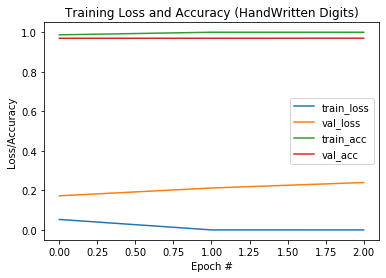

In [32]:
import numpy as np
print("[INFO] evaluating network...")
predictions = model.predict(x=testX, batch_size=32)
# plot the training loss and accuracy
N = np.arange(0, EPOCHS)

plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (HandWritten Digits)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [33]:
predictions = model.predict([testX])

9


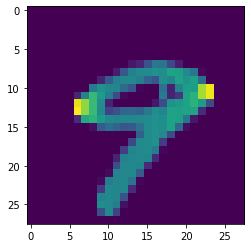

In [40]:
import matplotlib.pyplot as plt

print(np.argmax(predictions[9]))
plt.imshow(testX[9])
plt.show()